# PySWEB example: plot SSEBop + SWEB time series

This notebook runs `visualisation/plot_time_series.py` and previews the generated figure and CSV.

## Configure paths and run settings

Set `USE_POINT_MODE = True` for nearest-grid-cell extraction, or `False` for domain-mean extraction.

In [4]:
from pathlib import Path
import subprocess
import sys

PROJECT_DIR = Path("/g/data/ym05/sweb_model")
PYSWEB_DIR = PROJECT_DIR / "PySWEB"

RUN_SUBDIR = "Boonaldoon"
START_DATE = "2023-01-01"
END_DATE = "2025-12-31"

USE_POINT_MODE = True
POINT_LAT = -29.50
POINT_LON = 149.39

OUTPUT_DIR = PROJECT_DIR / "figures"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

TIMESERIES_PNG = OUTPUT_DIR / f"{RUN_SUBDIR}_timeseries_notebook.png"
TIMESERIES_CSV = OUTPUT_DIR / f"{RUN_SUBDIR}_timeseries_notebook.csv"

PLOT_SCRIPT = PYSWEB_DIR / "visualisation" / "plot_time_series.py"
PLOT_SCRIPT


PosixPath('/g/data/ym05/sweb_model/PySWEB/visualisation/plot_time_series.py')

In [5]:
cmd = [
    sys.executable,
    str(PLOT_SCRIPT),
    "--run-subdir", RUN_SUBDIR,
    "--start-date", START_DATE,
    "--end-date", END_DATE,
    "--output", str(TIMESERIES_PNG),
    "--csv-out", str(TIMESERIES_CSV),
]

if USE_POINT_MODE:
    cmd.extend(["--lat", str(POINT_LAT), "--lon", str(POINT_LON)])

print("Running:")
print(" ".join(cmd))

subprocess.run(cmd, cwd=str(PYSWEB_DIR), check=True)
print(f"Wrote figure: {TIMESERIES_PNG}")
print(f"Wrote CSV:    {TIMESERIES_CSV}")


Running:
/g/data/yx97/users_unikey/yiyu0116/softwares/miniconda3/envs/geo_env/bin/python /g/data/ym05/sweb_model/PySWEB/visualisation/plot_time_series.py --run-subdir Boonaldoon --start-date 2023-01-01 --end-date 2025-12-31 --output /g/data/ym05/sweb_model/figures/Boonaldoon_timeseries_notebook.png --csv-out /g/data/ym05/sweb_model/figures/Boonaldoon_timeseries_notebook.csv --lat -29.5 --lon 149.39
SSEBop: /g/data/ym05/sweb_model/2_ssebop_outputs/Boonaldoon/et_daily_ssebop_2020-11-01_2026-02-11.nc
  mode      : point
  nearest   : lat=-29.500090, lon=149.389877
  variables : ET, E, T
  time span : 2023-01-01 to 2025-12-31
  n points  : 1096
SWEB: /g/data/ym05/sweb_model/4_sweb_outputs/Boonaldoon/SWEB_RZSM_2023-01-01_2026-01-31.nc
  mode      : point
  nearest   : lat=-29.500000, lon=149.390000
  variables : rzsm_layer_1, rzsm_layer_2, rzsm_layer_3, rzsm_layer_4, rzsm_layer_5
  time span : 2023-01-01 to 2025-12-31
  n points  : 1096
Wrote CSV: /g/data/ym05/sweb_model/figures/Boonaldoon_

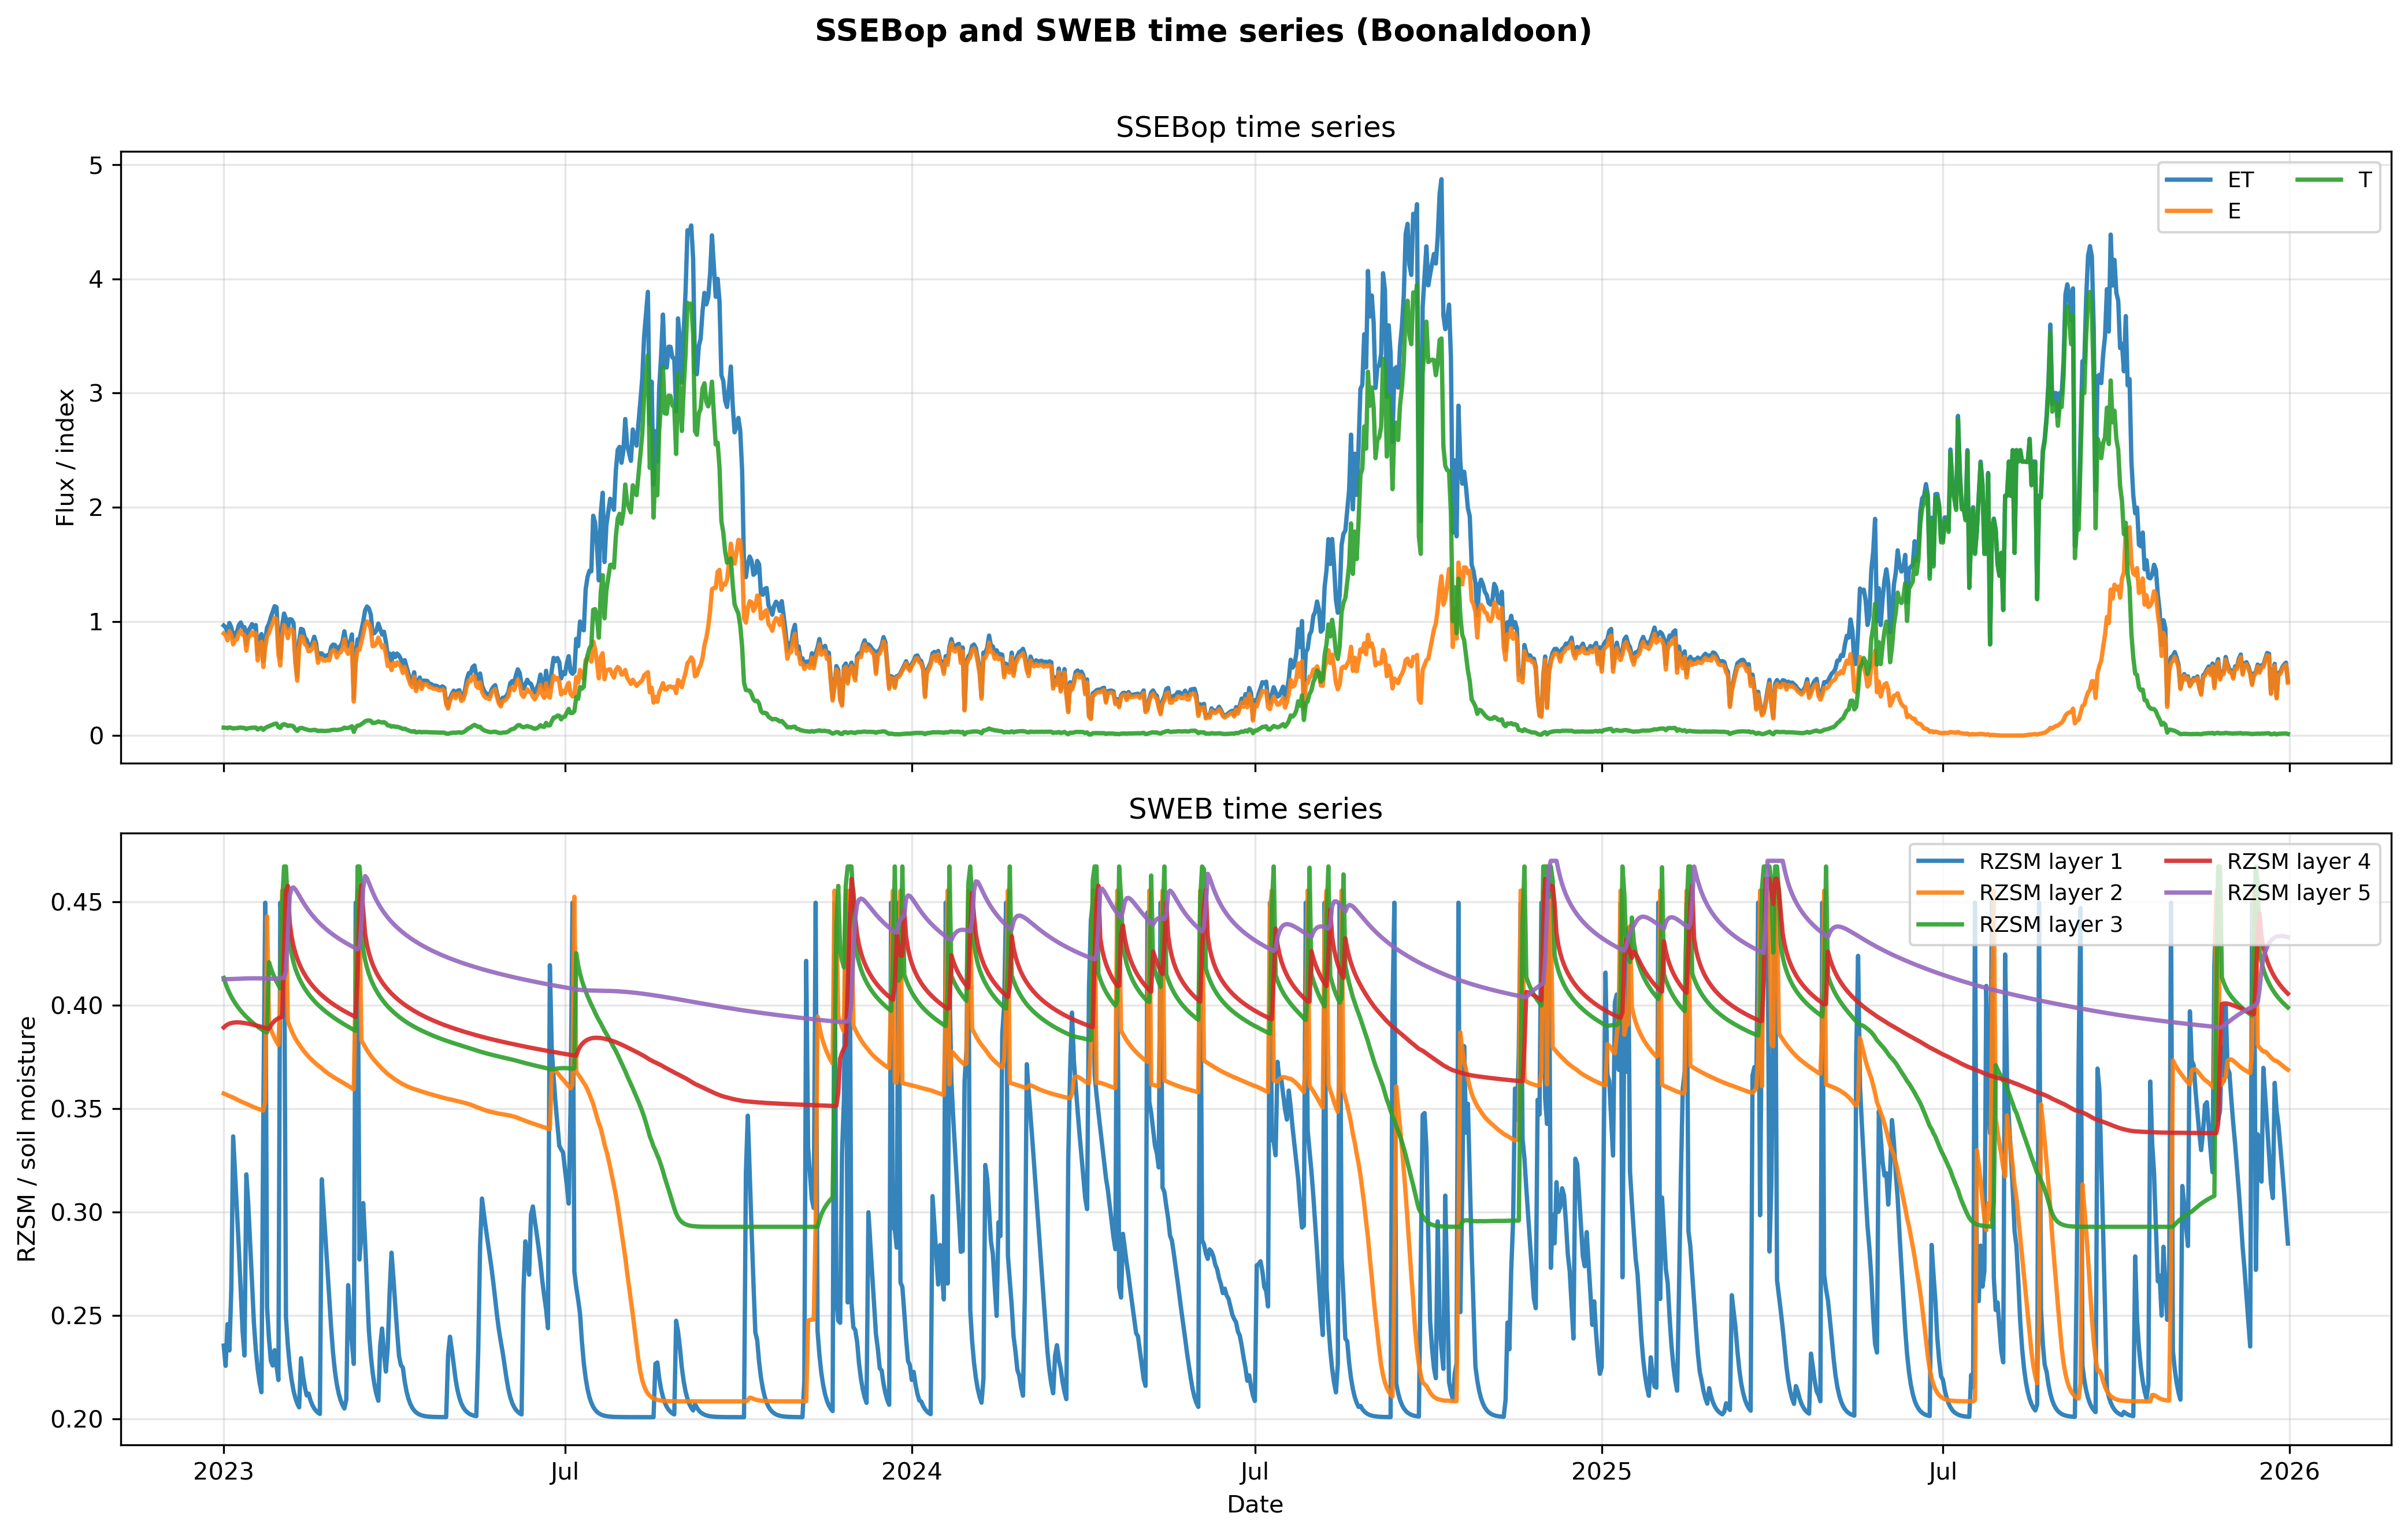

,time,ssebop_ET,ssebop_E,ssebop_T,sweb_rzsm_layer_1,sweb_rzsm_layer_2,sweb_rzsm_layer_3,sweb_rzsm_layer_4,sweb_rzsm_layer_5
0,2023-01-01,0.963184,0.893748,0.069435,0.235480,0.357354,0.413242,0.389289,0.412689
1,2023-01-02,0.949950,0.881560,0.068390,0.225699,0.356957,0.410446,0.390128,0.412666
2,2023-01-03,0.899266,0.834611,0.064655,0.245857,0.356570,0.408083,0.390725,0.412666
3,2023-01-04,0.985941,0.915149,0.070792,0.233148,0.356189,0.406041,0.391147,0.412681
4,2023-01-05,0.947775,0.879815,0.067960,0.262068,0.355789,0.404229,0.391434,0.412708


In [6]:
from IPython.display import Image, display
import pandas as pd

display(Image(filename=str(TIMESERIES_PNG)))
pd.read_csv(TIMESERIES_CSV).head()


## Optional: customise plotted variables

Add CLI options like:
- `--ssebop-vars ET E T`
- `--sweb-vars rzsm_layer_1 rzsm_layer_2 profile_sm`

You can also run SWEB-only or SSEBop-only by providing `--sweb-path` or `--ssebop-path` directly.